## Solving the System of Equations

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import coupled_oscillator as co

# defining the parameters
gravity = 1
mass = 1
length = 1
spring_constant = 10**2  # freqency of spring is 10 times the frequency of pendulum
osc_prop = co.OscillatorProperties(
    gravity=gravity, mass=mass, length=length, spring_constant=spring_constant)
hamiltonian = co.Hamiltonian(osc_prop)  # This defines the system of equations

# defining the initial conditions
angle_deg = -45
angle_rad = np.deg2rad(angle_deg)
spring_displacement = -0.1
phase_ini = co.Phase(osc_prop, angle=angle_rad, displacement=spring_displacement)

# Let's solve the system for one period of the pendulum
solution = co.solve(
    hamiltonian=hamiltonian, 
    phase=phase_ini, 
    time_span=[0, 1*np.pi],
    num_points=1000)

## Trajectory in Cartesian Coordinates

Text(0.5, 1.0, 'Pendulum Trajectory')

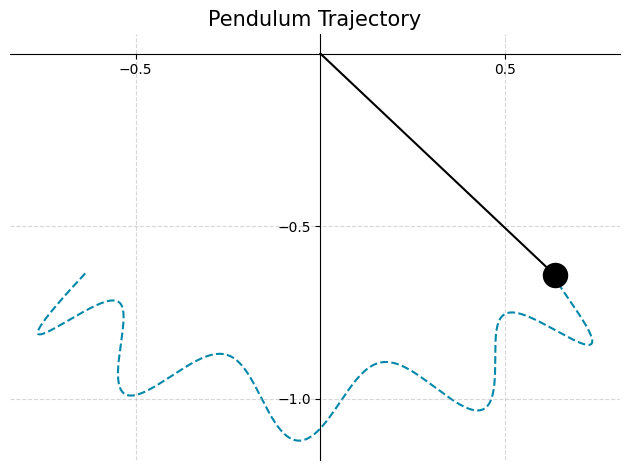

In [2]:
# the solution is given in the generalized coordinates. We need to convert it 
# back to the cartesian coordinates

def generalized_to_cartesian(ds: xr.Dataset) -> xr.Dataset:
    """Converts the generalized coordinates to cartesian coordinates"""
    # get the phase object from the dataset
    phase = co.Phase.from_xr(osc_prop=osc_prop, xr_data=ds)
    # use the phase object to convert the generalized coordinates to cartesian coordinates
    coords = phase.to_cartesian_coordinates()
    # create a new dataset with the cartesian coordinates
    ds_cartesian = xr.Dataset({
        "time": xr.DataArray([ds["time"].item()], dims="time"),
        "x": xr.DataArray([coords[0]], dims="time"),
        "y": xr.DataArray([coords[1]], dims="time"),})
    return ds_cartesian

# apply the transformation to the solution
cart_solution = solution.groupby("time").map(generalized_to_cartesian)

# extract the x and y coordinates
x = cart_solution["x"].values
y = cart_solution["y"].values

# Create a figure
fig, ax = plt.subplots(tight_layout=True)

# plot the trajectory
plt.plot(x, y, "--", zorder=1, color="#0088aa")
plt.plot([0, x[-1]], [0, y[-1]], "k", zorder=2)
plt.scatter(x[-1], y[-1], s=300, color="black", zorder=3)

# Move spines
[ax.spines[pos].set_position(('data', 0)) for pos in ['left', 'bottom']]
[ax.spines[pos].set_color('none') for pos in ['right', 'top']]

# Set up ticks
ax.xaxis.set_ticks([-0.5, 0.5])
ax.yaxis.set_ticks([-1.0, -0.5])
plt.grid(True, linestyle="--", alpha=0.5)
plt.title("Pendulum Trajectory", fontsize=15)

## Trajectory in Configuration Space

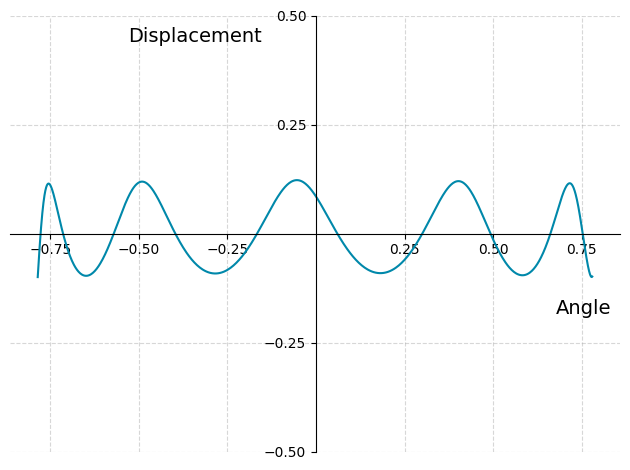

In [3]:
# Create a figure
fig, ax = plt.subplots(tight_layout=True)
plt.plot(solution.angle, solution.displacement, "#0088aa")

# Create x label in the right position
plt.xlabel("Angle", fontsize=14, labelpad=30, x=0.94)
plt.ylabel("Displacement", fontsize=14, labelpad=50, y=0.93, rotation=0)

# Move spines
[ax.spines[pos].set_position(('data', 0)) for pos in ['left', 'bottom']]
[ax.spines[pos].set_color('none') for pos in ['right', 'top']]

# Set up ticks
ax.xaxis.set_ticks([-0.75, -0.5, -0.25, 0.25, 0.5, 0.75])
ax.yaxis.set_ticks([-0.5, -0.25, 0.25, 0.5])
plt.grid(True, linestyle="--", alpha=0.5)
# plt.title("Configuration Space", fontsize=15)

## Time Series

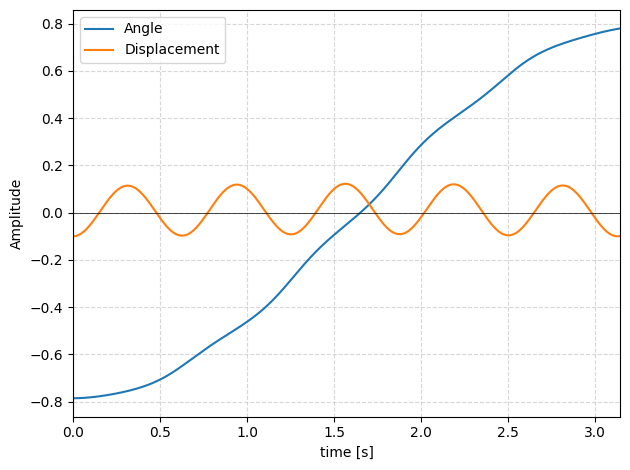

In [4]:
fig, ax = plt.subplots(tight_layout=True)

solution.angle.plot(label="Angle")
solution.displacement.plot(label="Displacement")
plt.grid(True, linestyle="--", alpha=0.5)
plt.axhline(0, color='black', lw=0.5)
plt.xlim(0, np.pi)
plt.ylabel("Amplitude")
plt.legend()